# Linear Regression

In [1]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(caTools)
library(modelr)

Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'corrplot' was built under R version 3.6.1"corrplot 0.84 loaded
Warning message:
"package 'caTools' was built under R version 3.6.1"

In [2]:
df <- read.csv("Advertising.csv")

## Understanding data

In [3]:
head(df)

X,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [4]:
df <- select(df,TV,radio,newspaper,sales)

In [5]:
head(df)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


In [6]:
summary(df)

       TV             radio          newspaper          sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:10.38  
 Median :149.75   Median :22.900   Median : 25.75   Median :12.90  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :14.02  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:17.40  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

In [7]:
str(df)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


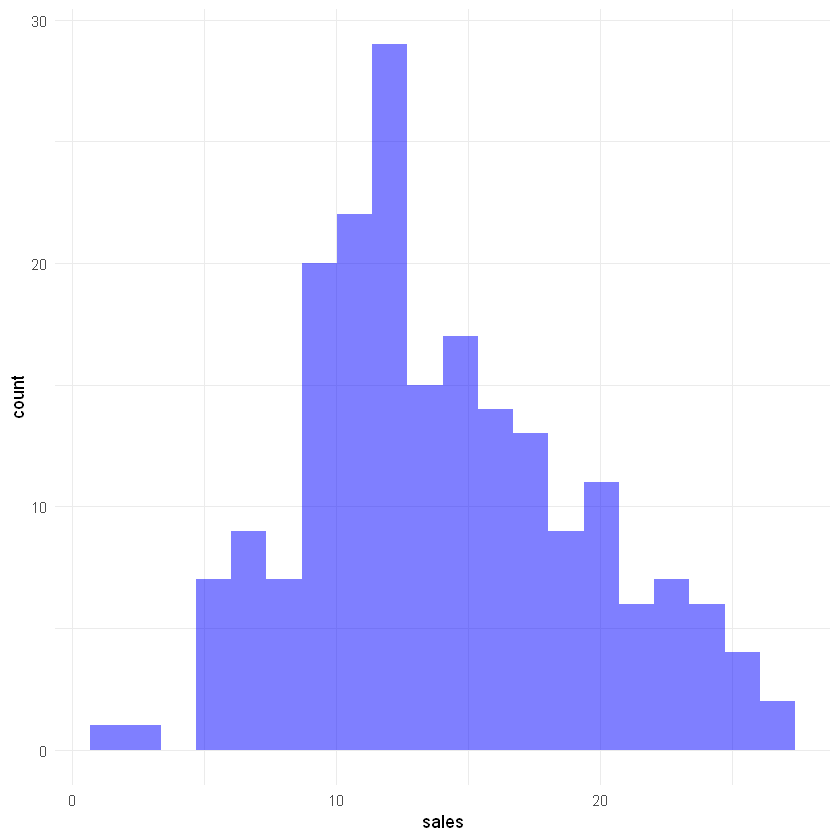

In [8]:
ggplot(df,aes(x=sales)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

## Check correlation 

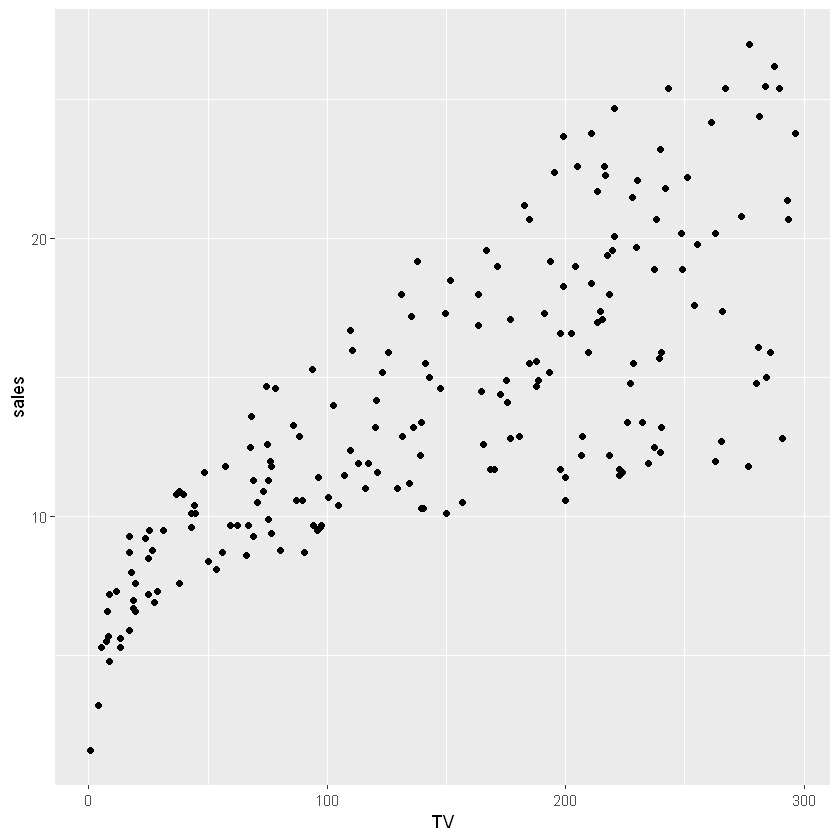

In [9]:
ggplot(df,aes(x=TV,y=sales)) + geom_point()

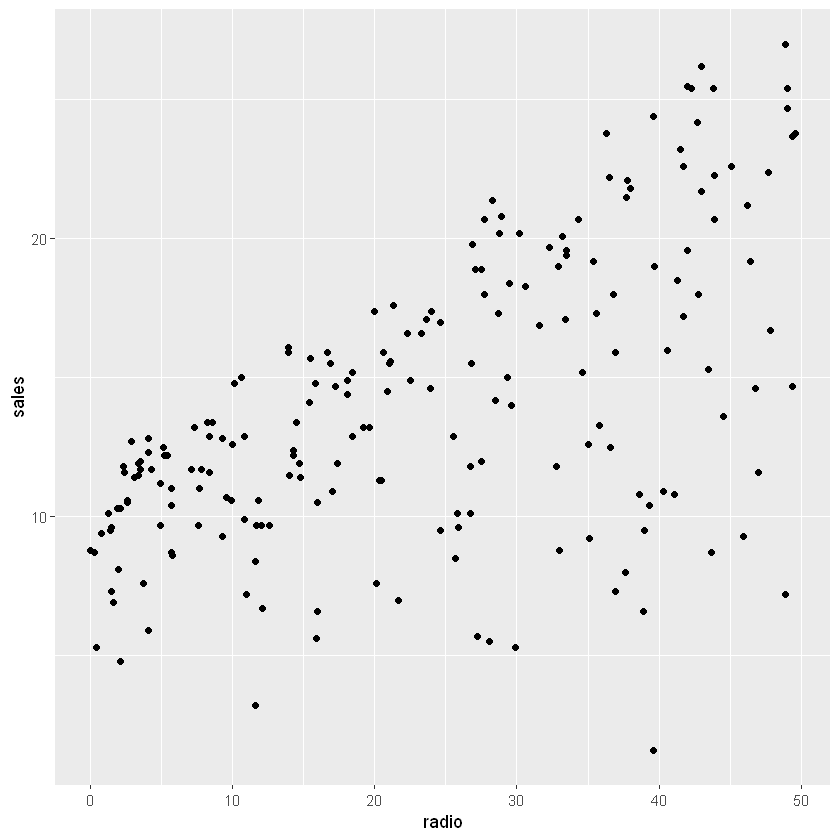

In [10]:
ggplot(df,aes(x=radio,y=sales)) + geom_point()

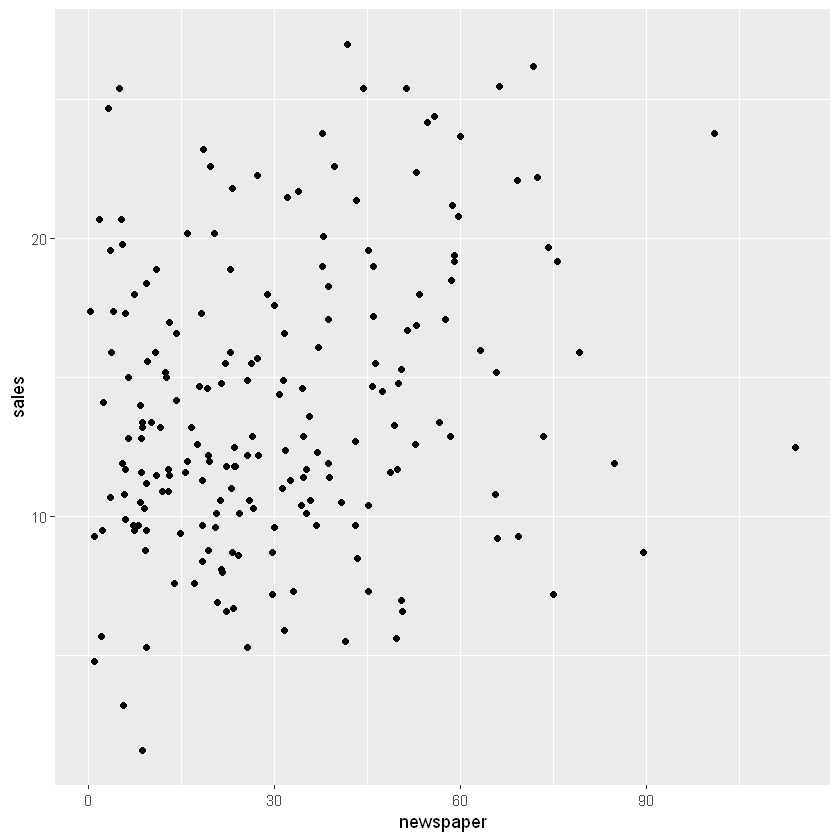

In [11]:
ggplot(df,aes(x=newspaper,y=sales)) + geom_point()

In [12]:
cor.data = cor(df)

In [13]:
cor.data

,TV,radio,newspaper,sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
radio,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


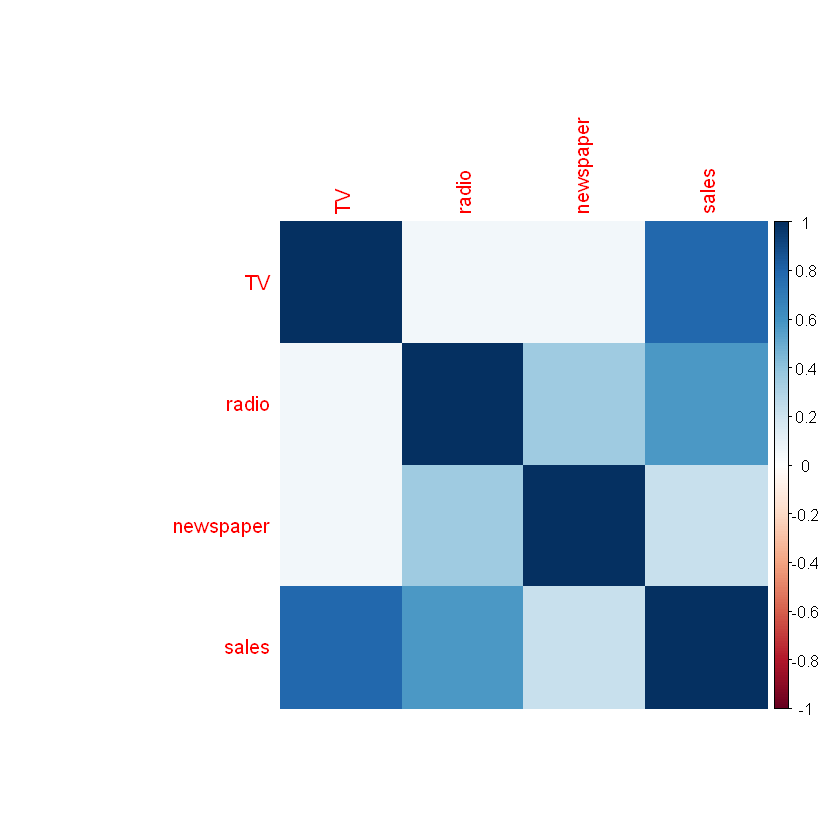

In [14]:
corrplot(cor.data,method="color")

## Split data for test and train

In [15]:
set.seed(101)

sample <- sample.split(df, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)

## Linear regression (Training) with TV

In [16]:
model1 <- lm(sales ~ TV,train)

In [17]:
summary(model1)


Call:
lm(formula = sales ~ TV, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5914 -1.8206 -0.1725  2.0067  7.1569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.950596   0.647763   10.73   <2e-16 ***
TV          0.048082   0.003771   12.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.18 on 98 degrees of freedom
Multiple R-squared:  0.624,	Adjusted R-squared:  0.6201 
F-statistic: 162.6 on 1 and 98 DF,  p-value: < 2.2e-16


In [18]:
coef(model1)

(Intercept)          TV 
 6.95059616  0.04808213

## Linear regression (Testing)

In [19]:
prediction <- predict(model1,test)

In [20]:
head(prediction)

3         4         7         8        11        12 
 7.777609 14.235038  9.715318 12.730068 10.128825 17.273829

In [21]:
results <- cbind(prediction,test$sales)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
head(results)

,pred,real
3,7.777609,9.3
4,14.235038,18.5
7,9.715318,11.8
8,12.730068,13.2
11,10.128825,8.6
12,17.273829,17.4


## Evaluation metrics

In [22]:
rsquare(model1,data=test)
mse(model1,data=test)
rmse(model1,data=test)

[1] 0.5998215

[1] 11.11985

[1] 3.334644

## Modeling with Newspaper

In [23]:
model2 <- lm(sales ~ newspaper,train)

In [24]:
coef(model2)

(Intercept)   newspaper 
12.60317679  0.04723194

In [25]:
rsquare(model2,data=test)
mse(model2,data=test)
rmse(model2,data=test)

[1] 0.05359291

[1] 26.30027

[1] 5.128378

## Modeling with Radio

In [26]:
model3 <- lm(sales ~ radio,train)

In [27]:
coef(model3)

(Intercept)       radio 
   9.092625    0.220937

In [28]:
rsquare(model3,data=test)
mse(model3,data=test)
rmse(model3,data=test)

[1] 0.2656098

[1] 20.58305

[1] 4.536854

## Multiple linear regression

In [29]:
model4 <- lm(sales ~ .,train)

In [30]:
coef(model4)

(Intercept)           TV        radio    newspaper 
 3.264222653  0.044286713  0.194858387 -0.006221198

In [31]:
rsquare(model4,data=test)
mse(model4,data=test)
rmse(model4,data=test)

[1] 0.8736628

[1] 3.548081

[1] 1.883635

## Linear Assumptions

In [32]:
model5 <- lm(sales ~ TV + radio,train)

In [33]:
coef(model5)

(Intercept)          TV       radio 
 3.14835265  0.04421897  0.19147782

In [34]:
prediction <- predict(model5,test)

In [35]:
results <- cbind(prediction,test$sales)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
head(results)

,pred,real
3,12.697751,9.3
4,17.755561,18.5
7,11.971416,11.8
8,12.216438,13.2
11,7.181798,8.6
12,17.237633,17.4


### 1) Residual vs Prediction plot

In [36]:
results = mutate(results,residuals = pred - real)

In [37]:
head(results)

pred,real,residuals
12.697751,9.3,3.3977511
17.755561,18.5,-0.7444391
11.971416,11.8,0.1714161
12.216438,13.2,-0.9835617
7.181798,8.6,-1.4182020
17.237633,17.4,-0.1623665


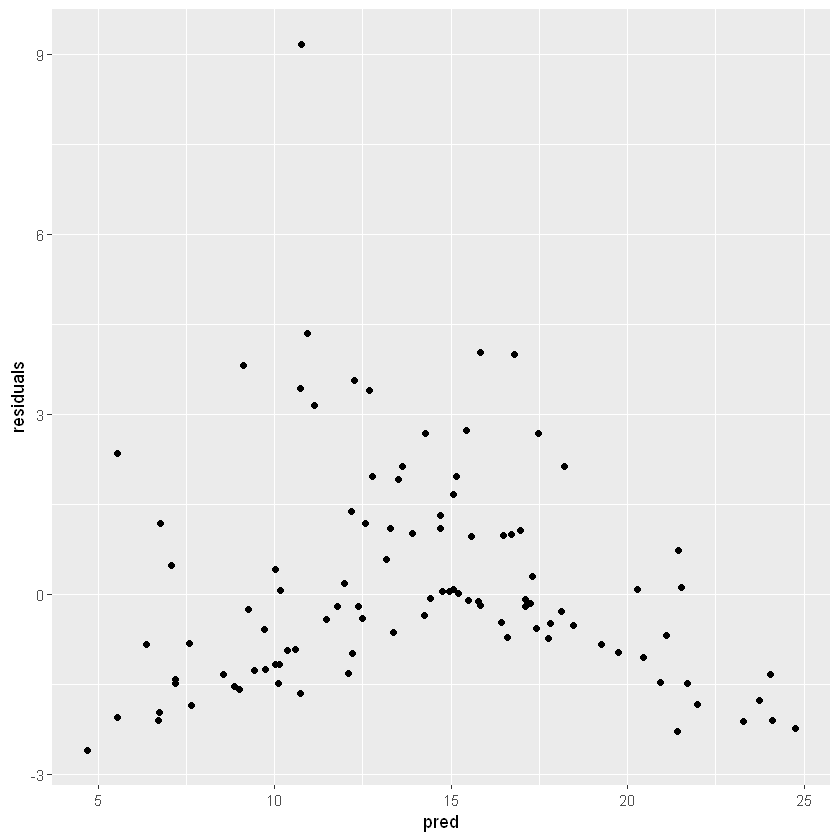

In [38]:
ggplot(results,aes(x=pred,y=residuals)) + geom_point()

### 2) Residual histogram

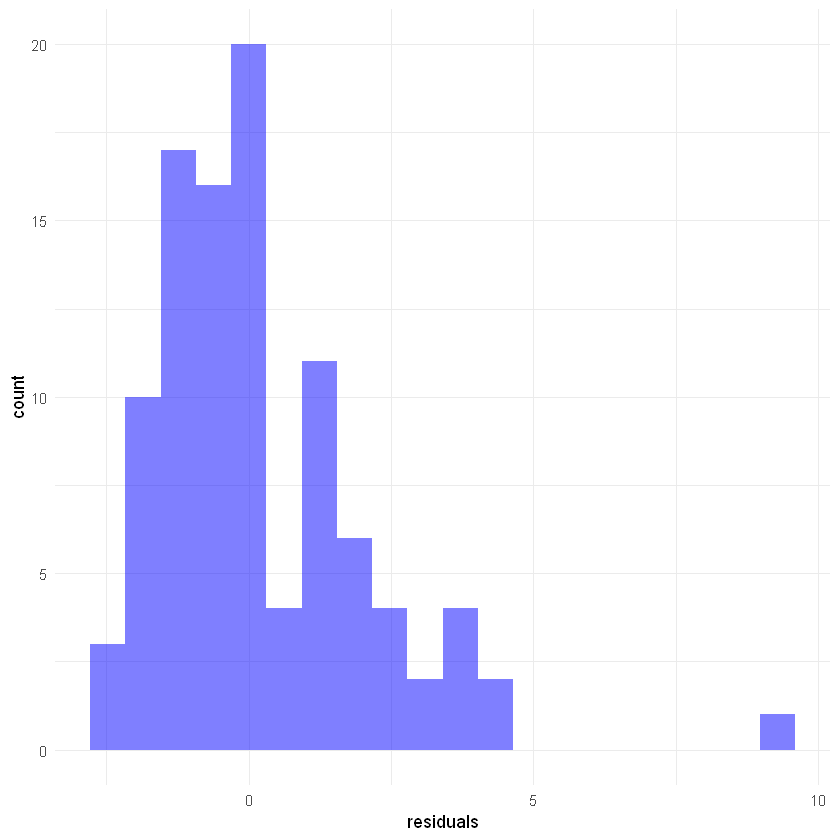

In [39]:
ggplot(results,aes(x=residuals)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

In [40]:
rsquare(model5,data=test)
mse(model5,data=test)
rmse(model5,data=test)

[1] 0.874934

[1] 3.502434

[1] 1.871479

## Polynomial regression

In [41]:
train = mutate(train,TV2 = TV^2)
train = mutate(train,radio2 = radio^2)
head(train)

TV,radio,newspaper,sales,TV2,radio2
230.1,37.8,69.2,22.1,52946.01,1428.84
44.5,39.3,45.1,10.4,1980.25,1544.49
180.8,10.8,58.4,12.9,32688.64,116.64
8.7,48.9,75.0,7.2,75.69,2391.21
8.6,2.1,1.0,4.8,73.96,4.41
199.8,2.6,21.2,10.6,39920.04,6.76


In [42]:
test = mutate(test,TV2 = TV^2)
test = mutate(test,radio2 = radio^2)
head(test)

TV,radio,newspaper,sales,TV2,radio2
17.2,45.9,69.3,9.3,295.84,2106.81
151.5,41.3,58.5,18.5,22952.25,1705.69
57.5,32.8,23.5,11.8,3306.25,1075.84
120.2,19.6,11.6,13.2,14448.04,384.16
66.1,5.8,24.2,8.6,4369.21,33.64
214.7,24.0,4.0,17.4,46096.09,576.00


In [43]:
model6 <- lm(sales ~ TV + radio + TV2 + radio2, train)

In [44]:
coef(model6)

(Intercept)            TV         radio           TV2        radio2 
 2.164577e+00  6.810395e-02  1.700113e-01 -8.394832e-05  5.111619e-04

In [45]:
prediction <- predict(model6,test)

In [46]:
rsquare(model6,data=test)
mse(model6,data=test)
rmse(model6,data=test)

[1] 0.9010881

[1] 2.76774

[1] 1.663653

In [49]:
results <- cbind(prediction,test$sales)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
head(results)

pred,real
12.191568,9.3
18.448872,18.5
11.929298,11.8
12.666372,13.2
7.302722,8.6
17.291506,17.4


In [50]:
results = mutate(results,residuals = pred - real)

In [51]:
head(results)

pred,real,residuals
12.191568,9.3,2.89156802
18.448872,18.5,-0.05112794
11.929298,11.8,0.12929828
12.666372,13.2,-0.53362765
7.302722,8.6,-1.29727846
17.291506,17.4,-0.10849402


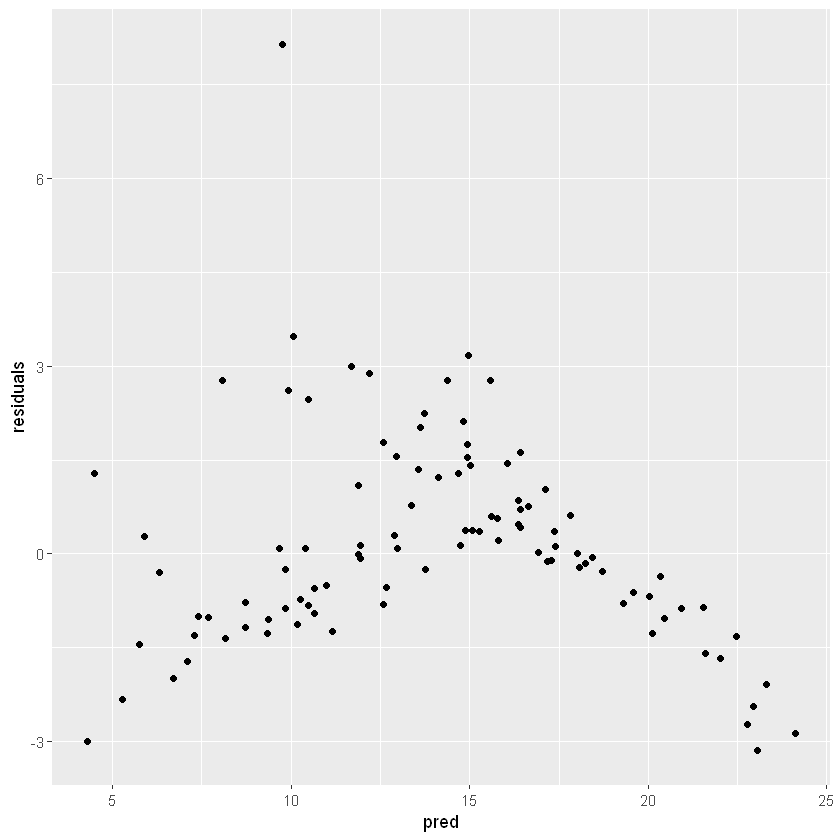

In [52]:
ggplot(results,aes(x=pred,y=residuals)) + geom_point()

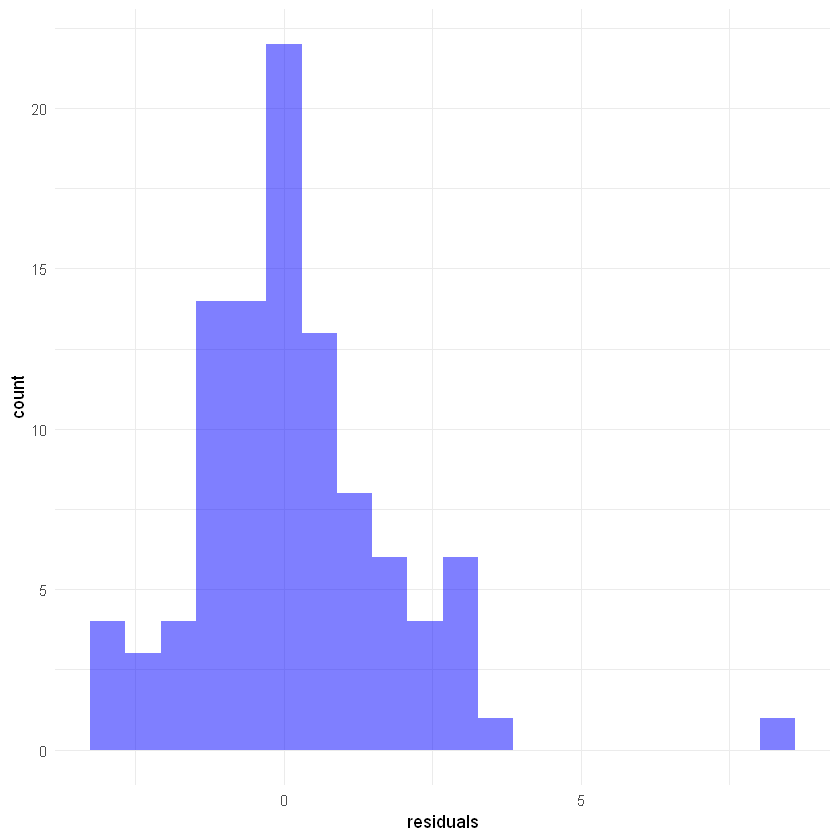

In [53]:
ggplot(results,aes(x=residuals)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()